In [1]:
import seaborn as sns
import pandas as pd
import csv
import scipy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
color = sns.color_palette()
import math
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [2]:
# WoE 2016 Data
data = pd.read_csv('C:/Users/myang/Desktop/Zillow-Data-Analysis-master/final_wts_2016.csv')
data.head()

,parcelid,logerror,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,...,roomcnt_woe,threeqtbath_woe,unitcnt_woe,yearbuilt_woe,numstories_woe,staxvaldolcnt_woe,taxvaldolcnt_woe,ltaxvaldolcnt_woe,taxamt_woe,censustract_woe
0,11016594,0.0276,1.0,2.0,3.0,4.0,2.0,NaN,1684.0,1684.0,...,-0.041770,-0.041770,-0.101506,-0.030963,-0.036767,0.130287,0.214726,0.152977,0.191368,-0.051303
1,14366692,-0.1684,NaN,3.5,4.0,NaN,3.5,NaN,2263.0,2263.0,...,-0.041770,0.317111,0.210052,0.276015,-0.036767,-0.149818,0.217739,0.152977,0.056771,-0.051303
2,12098116,-0.0040,1.0,3.0,2.0,4.0,3.0,NaN,2217.0,2217.0,...,-0.041770,-0.041770,-0.101506,-0.255942,-0.036767,-0.111030,-0.193150,-0.108883,-0.292683,-0.067855
3,12643413,0.0218,1.0,2.0,2.0,4.0,2.0,NaN,839.0,839.0,...,-0.041770,-0.041770,-0.101506,0.297632,-0.036767,0.196427,0.054776,-0.052724,-0.035958,0.011550
4,14432541,-0.0050,NaN,2.5,4.0,NaN,2.5,NaN,2283.0,2283.0,...,0.275848,0.317111,0.210052,0.153717,0.133321,0.196427,0.233719,0.180419,0.181876,0.181329


In [3]:
test = pd.read_csv('C:/Users/myang/Desktop/Zillow-Data-Analysis-master/Merged_bin_2016.csv')
test.shape

(180550, 80)

In [4]:
X = data.iloc[:, 80:117]
X.head()
# X.shape

,ac_woe,bath_woe,bed_woe,bqual_woe,calcbath_woe,ffloor1sqft_woe,calcfinsqft_woe,finsqft12_woe,finsqft15_woe,finsqft50_woe,...,roomcnt_woe,threeqtbath_woe,unitcnt_woe,yearbuilt_woe,numstories_woe,staxvaldolcnt_woe,taxvaldolcnt_woe,ltaxvaldolcnt_woe,taxamt_woe,censustract_woe
0,0.131836,-0.047820,0.034737,-0.088330,0.014,-0.012235,0.119165,0.174233,0.040837,-0.012235,...,-0.041770,-0.041770,-0.101506,-0.030963,-0.036767,0.130287,0.214726,0.152977,0.191368,-0.051303
1,-0.057229,0.126679,0.075017,0.170682,0.014,-0.012235,0.076479,0.112292,0.040837,-0.012235,...,-0.041770,0.317111,0.210052,0.276015,-0.036767,-0.149818,0.217739,0.152977,0.056771,-0.051303
2,0.131836,0.126679,0.034737,-0.088330,0.014,-0.012235,0.076479,0.112292,0.040837,-0.012235,...,-0.041770,-0.041770,-0.101506,-0.255942,-0.036767,-0.111030,-0.193150,-0.108883,-0.292683,-0.067855
3,0.131836,-0.047820,0.034737,-0.088330,0.014,-0.012235,-0.209316,-0.037899,0.040837,-0.012235,...,-0.041770,-0.041770,-0.101506,0.297632,-0.036767,0.196427,0.054776,-0.052724,-0.035958,0.011550
4,-0.057229,0.126679,0.075017,0.170682,0.014,-0.012235,0.016689,0.112292,0.040837,-0.012235,...,0.275848,0.317111,0.210052,0.153717,0.133321,0.196427,0.233719,0.180419,0.181876,0.181329


In [5]:
y = data['pf']
y.head()
# y.count()

0    1
1    1
2    1
3    1
4    1
Name: pf, dtype: int64

### Weighted Logistic Regression

In [6]:
#missing check
missingvalues = X.isnull().sum()
print(missingvalues)

ac_woe                   0
bath_woe                 0
bed_woe                  0
bqual_woe                0
calcbath_woe             0
ffloor1sqft_woe          0
calcfinsqft_woe          0
finsqft12_woe            0
finsqft15_woe            0
finsqft50_woe            0
fips_woe                 0
fireplacecnt_woe         0
fullbathcnt_woe          0
garagecarcnt_woe         0
garagetotalsqft_woe      0
heatsystypeid_woe        0
latitude_woe             0
longitude_woe            0
lotsizesqft_woe          0
poolcnt_woe              0
pooltypeid7_woe          0
proplandusetypeid_woe    0
rawcensus_woe            0
regionidcity_woe         0
regionidcounty_woe       0
regionidneigh_woe        0
regionidzip_woe          0
roomcnt_woe              0
threeqtbath_woe          0
unitcnt_woe              0
yearbuilt_woe            0
numstories_woe           0
staxvaldolcnt_woe        0
taxvaldolcnt_woe         0
ltaxvaldolcnt_woe        0
taxamt_woe               0
censustract_woe          0
d

In [7]:
weights = data['weight']
weights.head()
# weights.count()

0    0.044426
1    0.271064
2    0.006439
3    0.035090
4    0.008048
Name: weight, dtype: float64

In [14]:
#convert to dict?

# weights = weights.to_dict()

In [8]:
# clf = LogisticRegressionCV(cv=5, random_state=0).fit(X,y)
clf = linear_model.SGDClassifier(loss = "log", max_iter = 1000, random_state=0)

In [9]:
clf.fit(X, y, sample_weight = weights)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [13]:
clf.score(X, y, sample_weight = weights)

0.8980194181054363

### Random Forest

In [14]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)

In [15]:
rfc.fit(X, y, sample_weight = weights)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
rfc.score(X, y, sample_weight = weights)

0.8982331670622802

In [17]:
print(rfc.feature_importances_)

[0.01381762 0.02509665 0.03534499 0.00933795 0.01115261 0.00196999
 0.04455589 0.05096944 0.02372574 0.00198053 0.00537499 0.00448653
 0.01069536 0.0074898  0.00742686 0.02065543 0.04352882 0.04523926
 0.01317358 0.00758945 0.00753228 0.03668014 0.04376806 0.01142392
 0.00541545 0.02323919 0.05852822 0.01157124 0.00296556 0.00662433
 0.11604607 0.00627823 0.0617632  0.06963997 0.05219433 0.05908113
 0.04363722]


In [20]:
sort = sorted(rfc.feature_importances_, reverse = True)
sort[:20]

[0.11604607409614752,
 0.06963996508793077,
 0.06176319515833796,
 0.059081125723428767,
 0.058528217703033764,
 0.052194326372452755,
 0.05096944337119555,
 0.04523925621130302,
 0.04455588602903074,
 0.043768061578038135,
 0.04363722422187496,
 0.043528817762233295,
 0.036680137651661344,
 0.035344992111956984,
 0.02509665353031603,
 0.02372574330858984,
 0.023239190577869395,
 0.020655429139252255,
 0.01381761850840497,
 0.013173575030698107]

In [22]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, sort):
    feats[feature] = importance #add the name/value pair 
print(feats)

{'ac_woe': 0.11604607409614752, 'bath_woe': 0.06963996508793077, 'bed_woe': 0.06176319515833796, 'bqual_woe': 0.059081125723428767, 'calcbath_woe': 0.058528217703033764, 'ffloor1sqft_woe': 0.052194326372452755, 'calcfinsqft_woe': 0.05096944337119555, 'finsqft12_woe': 0.04523925621130302, 'finsqft15_woe': 0.04455588602903074, 'finsqft50_woe': 0.043768061578038135, 'fips_woe': 0.04363722422187496, 'fireplacecnt_woe': 0.043528817762233295, 'fullbathcnt_woe': 0.036680137651661344, 'garagecarcnt_woe': 0.035344992111956984, 'garagetotalsqft_woe': 0.02509665353031603, 'heatsystypeid_woe': 0.02372574330858984, 'latitude_woe': 0.023239190577869395, 'longitude_woe': 0.020655429139252255, 'lotsizesqft_woe': 0.01381761850840497, 'poolcnt_woe': 0.013173575030698107, 'pooltypeid7_woe': 0.011571236965667076, 'proplandusetypeid_woe': 0.011423923122368953, 'rawcensus_woe': 0.011152607907185105, 'regionidcity_woe': 0.010695364080724329, 'regionidcounty_woe': 0.00933794628623104, 'regionidneigh_woe': 0.0

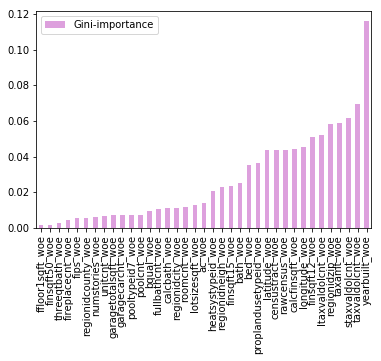

In [23]:
%matplotlib inline
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, rfc.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', color = 'plum')

### XGBoost

In [24]:
xgb_classifier = xgb.XGBClassifier(random_state=0)
xgb_classifier.fit(X, y, sample_weight = weights)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [25]:
xgb_classifier.score(X, y, sample_weight = weights)

C:\Users\myang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8980194181054363

In [26]:
print(xgb_classifier.feature_importances_)

[0.0162963  0.04148148 0.02074074 0.00888889 0.0162963  0.00148148
 0.06518518 0.04592593 0.00296296 0.         0.         0.00148148
 0.         0.00740741 0.         0.01037037 0.09037037 0.07555556
 0.0237037  0.00148148 0.         0.04592593 0.05925926 0.00444444
 0.         0.00888889 0.08       0.02074074 0.00148148 0.
 0.10074074 0.0162963  0.04592593 0.06222222 0.04444445 0.04444445
 0.03555556]


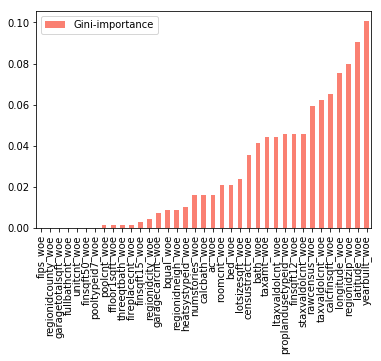

In [27]:
%matplotlib inline
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, xgb_classifier.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', color = 'salmon')

In [68]:
#New X to split 
X_weights = pd.concat([X, weights], axis = 1, sort = False)
X_weights.head()

,ac_woe,bath_woe,bed_woe,bqual_woe,calcbath_woe,ffloor1sqft_woe,calcfinsqft_woe,finsqft12_woe,finsqft15_woe,finsqft50_woe,...,threeqtbath_woe,unitcnt_woe,yearbuilt_woe,numstories_woe,staxvaldolcnt_woe,taxvaldolcnt_woe,ltaxvaldolcnt_woe,taxamt_woe,censustract_woe,weight
0,0.131836,-0.047820,0.034737,-0.088330,0.014,-0.012235,0.119165,0.174233,0.040837,-0.012235,...,-0.041770,-0.101506,-0.030963,-0.036767,0.130287,0.214726,0.152977,0.191368,-0.051303,0.044426
1,-0.057229,0.126679,0.075017,0.170682,0.014,-0.012235,0.076479,0.112292,0.040837,-0.012235,...,0.317111,0.210052,0.276015,-0.036767,-0.149818,0.217739,0.152977,0.056771,-0.051303,0.271064
2,0.131836,0.126679,0.034737,-0.088330,0.014,-0.012235,0.076479,0.112292,0.040837,-0.012235,...,-0.041770,-0.101506,-0.255942,-0.036767,-0.111030,-0.193150,-0.108883,-0.292683,-0.067855,0.006439
3,0.131836,-0.047820,0.034737,-0.088330,0.014,-0.012235,-0.209316,-0.037899,0.040837,-0.012235,...,-0.041770,-0.101506,0.297632,-0.036767,0.196427,0.054776,-0.052724,-0.035958,0.011550,0.035090
4,-0.057229,0.126679,0.075017,0.170682,0.014,-0.012235,0.016689,0.112292,0.040837,-0.012235,...,0.317111,0.210052,0.153717,0.133321,0.196427,0.233719,0.180419,0.181876,0.181329,0.008048


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_weights, y, test_size=0.33, random_state=0)

In [70]:
weight_train = X_train['weight']
weight_test = X_test['weight']
X_train2 = X_train.drop(['weight'], axis = 1)
X_test2 = X_test.drop(['weight'], axis = 1)

In [31]:
# Setting up initial parameters for our model, 
# with arbitrary guesses for the numerical parameters.
xgb_params = {
    "objective": "binary:logistic", 
    "max_depth": 6, 
    "silent": 0, 
    'eval_metric': 'auc', 
    'eta': 0.01
}

# Maximum number of trees we will collect
num_rounds = 1000

# Transforming our data into XGBoost's internal DMatrix structure
dtrain = xgb.DMatrix(X_train2, y_train, weight = weight_train)
dvalid = xgb.DMatrix(X_test2, y_test, weight = weight_test)

# Training
model = xgb.train(
    xgb_params,                           # Training parameters
    dtrain,                               # Data
    num_rounds,                           # Max number of trees
    [(dtrain,'train'),(dvalid,'test')],   # Validation set
    early_stopping_rounds=50,            # Stop early if no improvement for 100 rounds
    verbose_eval = False
)

# Best score obtained
print(model.best_score)

0.612266


In [71]:
# Setting up initial parameters for our model, 
# with arbitrary guesses for the numerical parameters.
xgb_params = {
    "objective": "binary:logistic", 
    "max_depth": 6, 
    "silent": 0, 
    'eval_metric': 'mae', 
    'eta': 0.01
}

# Maximum number of trees we will collect
num_rounds = 1000

# Transforming our data into XGBoost's internal DMatrix structure
dtrain = xgb.DMatrix(X_train2, y_train, weight = weight_train)
dvalid = xgb.DMatrix(X_test2, y_test, weight = weight_test)

# Training
model = xgb.train(
    xgb_params,                           # Training parameters
    dtrain,                               # Data
    num_rounds,                           # Max number of trees
    [(dtrain,'train'),(dvalid,'test')],   # Validation set
    early_stopping_rounds=50,            # Stop early if no improvement for 100 rounds
    verbose_eval = False
)

# Best score obtained
print(model.best_score)

0.179857


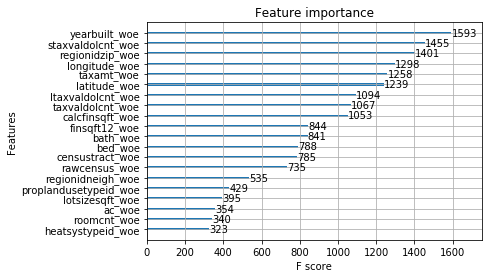

In [37]:
xgb.plot_importance(model, max_num_features = 20);
plt.show()

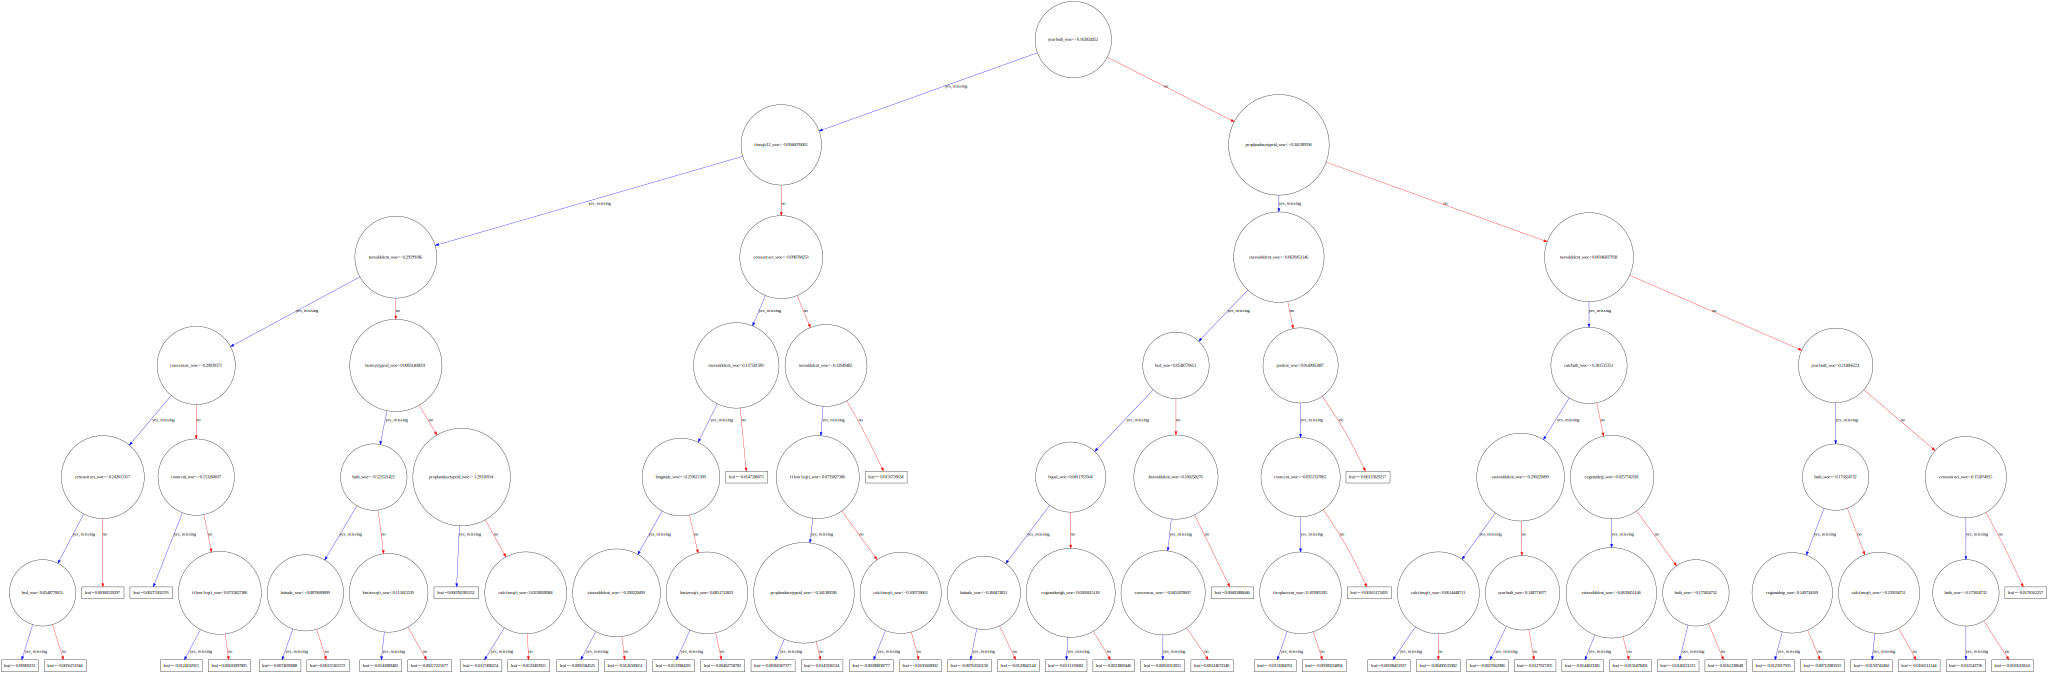

In [36]:
xgb.to_graphviz(model)

In [39]:
x_keep = X[['yearbuilt_woe', 'staxvaldolcnt_woe', 'regionidzip_woe', 'longitude_woe', 'taxamt_woe'
            , 'latitude_woe', 'ltaxvaldolcnt_woe', 'taxvaldolcnt_woe', 'calcfinsqft_woe', 'finsqft12_woe'
            , 'bath_woe', 'bed_woe', 'censustract_woe', 'rawcensus_woe', 'regionidneigh_woe'
            , 'proplandusetypeid_woe', 'lotsizesqft_woe', 'ac_woe', 'roomcnt_woe', 'heatsystypeid_woe']]
x_keep.head()

,yearbuilt_woe,staxvaldolcnt_woe,regionidzip_woe,longitude_woe,taxamt_woe,latitude_woe,ltaxvaldolcnt_woe,taxvaldolcnt_woe,calcfinsqft_woe,finsqft12_woe,bath_woe,bed_woe,censustract_woe,rawcensus_woe,regionidneigh_woe,proplandusetypeid_woe,lotsizesqft_woe,ac_woe,roomcnt_woe,heatsystypeid_woe
0,-0.030963,0.130287,0.161907,0.046647,0.191368,0.061154,0.152977,0.214726,0.119165,0.174233,-0.047820,0.034737,-0.051303,-0.035971,-0.012094,0.044916,-0.029247,0.131836,-0.041770,-0.024340
1,0.276015,-0.149818,0.127638,0.326575,0.056771,0.213601,0.152977,0.217739,0.076479,0.112292,0.126679,0.075017,-0.051303,0.173882,0.065977,0.044916,-0.029247,-0.057229,-0.041770,0.040969
2,-0.255942,-0.111030,-0.034142,-0.310847,-0.292683,-0.137355,-0.108883,-0.193150,0.076479,0.112292,0.126679,0.034737,-0.067855,-0.091855,-0.097586,0.044916,-0.029247,0.131836,-0.041770,-0.024340
3,0.297632,0.196427,0.137561,-0.208376,-0.035958,0.213601,-0.052724,0.054776,-0.209316,-0.037899,-0.047820,0.034737,0.011550,0.026609,-0.012094,0.044916,-0.029247,0.131836,-0.041770,-0.024340
4,0.153717,0.196427,0.127638,0.326575,0.181876,0.136037,0.180419,0.233719,0.016689,0.112292,0.126679,0.075017,0.181329,0.173882,0.065977,0.044916,-0.029247,-0.057229,0.275848,0.040969


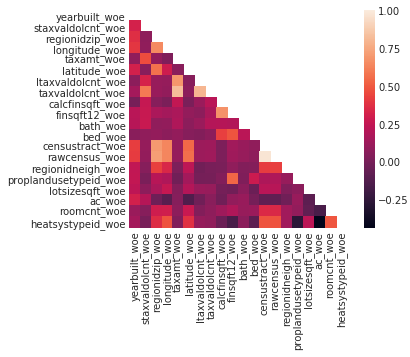

In [45]:
%matplotlib inline

corr = x_keep.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, mask = mask, square = True)

In [48]:
print("Correlation Matrix")
print(x_keep.corr())
print()

Correlation Matrix
                       yearbuilt_woe  staxvaldolcnt_woe  regionidzip_woe  \
yearbuilt_woe               1.000000           0.319286         0.371344   
staxvaldolcnt_woe           0.319286           1.000000         0.080710   
regionidzip_woe             0.371344           0.080710         1.000000   
longitude_woe               0.396872           0.085038         0.649322   
taxamt_woe                  0.087171           0.467345         0.095769   
latitude_woe                0.313323           0.058725         0.571697   
ltaxvaldolcnt_woe           0.075449           0.325417         0.107304   
taxvaldolcnt_woe            0.153368           0.597706         0.111055   
calcfinsqft_woe             0.000832           0.262645         0.049383   
finsqft12_woe               0.218341           0.269060         0.174705   
bath_woe                    0.213750           0.274202         0.083713   
bed_woe                     0.060523           0.083058         0.096

In [57]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(x_keep, 10))

Top Absolute Correlations
censustract_woe    rawcensus_woe        0.973839
taxamt_woe         taxvaldolcnt_woe     0.825319
ltaxvaldolcnt_woe  taxvaldolcnt_woe     0.802528
regionidzip_woe    rawcensus_woe        0.718760
                   censustract_woe      0.702185
taxamt_woe         ltaxvaldolcnt_woe    0.692114
calcfinsqft_woe    finsqft12_woe        0.677883
regionidzip_woe    longitude_woe        0.649322
longitude_woe      censustract_woe      0.639810
                   rawcensus_woe        0.637999
dtype: float64


In [62]:
x_adjkeep = x_keep[['yearbuilt_woe', 'staxvaldolcnt_woe', 'regionidzip_woe', 'longitude_woe', 'taxamt_woe'
            , 'latitude_woe', 'ltaxvaldolcnt_woe', 'calcfinsqft_woe'
            , 'bath_woe', 'bed_woe', 'censustract_woe', 'regionidneigh_woe'
            , 'proplandusetypeid_woe', 'lotsizesqft_woe', 'ac_woe', 'roomcnt_woe', 'heatsystypeid_woe']]
x_adjkeep.head()

,yearbuilt_woe,staxvaldolcnt_woe,regionidzip_woe,longitude_woe,taxamt_woe,latitude_woe,ltaxvaldolcnt_woe,calcfinsqft_woe,bath_woe,bed_woe,censustract_woe,regionidneigh_woe,proplandusetypeid_woe,lotsizesqft_woe,ac_woe,roomcnt_woe,heatsystypeid_woe
0,-0.030963,0.130287,0.161907,0.046647,0.191368,0.061154,0.152977,0.119165,-0.047820,0.034737,-0.051303,-0.012094,0.044916,-0.029247,0.131836,-0.041770,-0.024340
1,0.276015,-0.149818,0.127638,0.326575,0.056771,0.213601,0.152977,0.076479,0.126679,0.075017,-0.051303,0.065977,0.044916,-0.029247,-0.057229,-0.041770,0.040969
2,-0.255942,-0.111030,-0.034142,-0.310847,-0.292683,-0.137355,-0.108883,0.076479,0.126679,0.034737,-0.067855,-0.097586,0.044916,-0.029247,0.131836,-0.041770,-0.024340
3,0.297632,0.196427,0.137561,-0.208376,-0.035958,0.213601,-0.052724,-0.209316,-0.047820,0.034737,0.011550,-0.012094,0.044916,-0.029247,0.131836,-0.041770,-0.024340
4,0.153717,0.196427,0.127638,0.326575,0.181876,0.136037,0.180419,0.016689,0.126679,0.075017,0.181329,0.065977,0.044916,-0.029247,-0.057229,0.275848,0.040969


In [63]:
#New add weight back in
X_adjweights = pd.concat([x_adjkeep, weights], axis = 1, sort = False)
X_adjweights.head()

,yearbuilt_woe,staxvaldolcnt_woe,regionidzip_woe,longitude_woe,taxamt_woe,latitude_woe,ltaxvaldolcnt_woe,calcfinsqft_woe,bath_woe,bed_woe,censustract_woe,regionidneigh_woe,proplandusetypeid_woe,lotsizesqft_woe,ac_woe,roomcnt_woe,heatsystypeid_woe,weight
0,-0.030963,0.130287,0.161907,0.046647,0.191368,0.061154,0.152977,0.119165,-0.047820,0.034737,-0.051303,-0.012094,0.044916,-0.029247,0.131836,-0.041770,-0.024340,0.044426
1,0.276015,-0.149818,0.127638,0.326575,0.056771,0.213601,0.152977,0.076479,0.126679,0.075017,-0.051303,0.065977,0.044916,-0.029247,-0.057229,-0.041770,0.040969,0.271064
2,-0.255942,-0.111030,-0.034142,-0.310847,-0.292683,-0.137355,-0.108883,0.076479,0.126679,0.034737,-0.067855,-0.097586,0.044916,-0.029247,0.131836,-0.041770,-0.024340,0.006439
3,0.297632,0.196427,0.137561,-0.208376,-0.035958,0.213601,-0.052724,-0.209316,-0.047820,0.034737,0.011550,-0.012094,0.044916,-0.029247,0.131836,-0.041770,-0.024340,0.035090
4,0.153717,0.196427,0.127638,0.326575,0.181876,0.136037,0.180419,0.016689,0.126679,0.075017,0.181329,0.065977,0.044916,-0.029247,-0.057229,0.275848,0.040969,0.008048


In [64]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_adjweights, y, test_size=0.33, random_state=2)

weight_train2 = X_train3['weight']
weight_test2 = X_test3['weight']
X_train4 = X_train3.drop(['weight'], axis = 1)
X_test4 = X_test3.drop(['weight'], axis = 1)

In [65]:
# Setting up initial parameters for our model, 
# with arbitrary guesses for the numerical parameters.
xgb_params = {
    "objective": "binary:logistic", 
    "max_depth": 6, 
    "silent": 0, 
    'eval_metric': 'auc', 
    'eta': 0.01
}

# Maximum number of trees we will collect
num_rounds = 1000

# Transforming our data into XGBoost's internal DMatrix structure
dtrain = xgb.DMatrix(X_train4, y_train3, weight = weight_train2)
dvalid = xgb.DMatrix(X_test4, y_test3, weight = weight_test2)

# Training
model = xgb.train(
    xgb_params,                           # Training parameters
    dtrain,                               # Data
    num_rounds,                           # Max number of trees
    [(dtrain,'train'),(dvalid,'test')],   # Validation set
    early_stopping_rounds=50,            # Stop early if no improvement for 100 rounds
    verbose_eval = False
)

# Best score obtained
print(model.best_score)

0.609177


In [67]:
# Setting up initial parameters for our model, 
# with arbitrary guesses for the numerical parameters.
xgb_params = {
    "objective": "binary:logistic", 
    "max_depth": 6, 
    "silent": 0, 
    'eval_metric': 'mae', 
    'eta': 0.01
}

# Maximum number of trees we will collect
num_rounds = 1000

# Transforming our data into XGBoost's internal DMatrix structure
dtrain = xgb.DMatrix(X_train2, y_train, weight = weight_train)
dvalid = xgb.DMatrix(X_test2, y_test, weight = weight_test)

# Training
model = xgb.train(
    xgb_params,                           # Training parameters
    dtrain,                               # Data
    num_rounds,                           # Max number of trees
    [(dtrain,'train'),(dvalid,'test')],   # Validation set
    early_stopping_rounds=50,            # Stop early if no improvement for 100 rounds
    verbose_eval = False
)

# Best score obtained
print(model.best_score)

0.180663
